# Ejercicio 1: Preparación del ambiente de trabajo

* Importe los módulos clásicos del trabajo de ciencia de datos
* El archivo tiene el nombre comprensive_strength_concrete.csv. Impórtelo y genere estadísticas descriptivas.
* En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM.

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygam
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20,12)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pygam import LinearGAM
from pygam.utils import generate_X_grid
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

In [192]:
# Para generar métricas del modelo:

def report_metrics(model, X_test, y_test, args=0):
    print("Test R2 accuracy: {}".format(r2_score(model.predict(X_test), y_test).round(4)))
    print("Test MSE accuracy: {}".format(mean_squared_error(model.predict(X_test), y_test).round(4)))
    print("Test MAE accuracy: {}".format(median_absolute_error(model.predict(X_test), y_test).round(4)))

In [193]:
df = pd.read_csv("compresive_strength_concrete.csv")
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Ejercicio 2: Descripción

* El vector objetivo tiene el nombre de Concrete compressive strength(MPa, megapascals)
* Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos dificiles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a estas mediante notación de índice iloc. 
* Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decida si es necesario normalizarlos/escalarlos.

In [194]:
# Renombraremos las columnas

df.columns = ['cement', 'blast_furname_slag', 'fly_ash', 'water', 'superplasticizer',
              'coarse_aggregate', 'fine_aggregate', 'age', 'strength']
df.head()

,cement,blast_furname_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


 Tipo de datos en cada variable

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                1030 non-null float64
blast_furname_slag    1030 non-null float64
fly_ash               1030 non-null float64
water                 1030 non-null float64
superplasticizer      1030 non-null float64
coarse_aggregate      1030 non-null float64
fine_aggregate        1030 non-null float64
age                   1030 non-null int64
strength              1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [196]:
df.describe()

,cement,blast_furname_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Para decidir si es necesario normalizar o escalar los datos vamos a realizar una serie de gráficas que nos muestren el comportamiento de las variables por si sola y frente a las demás existenes.


### Correlación entre las variables

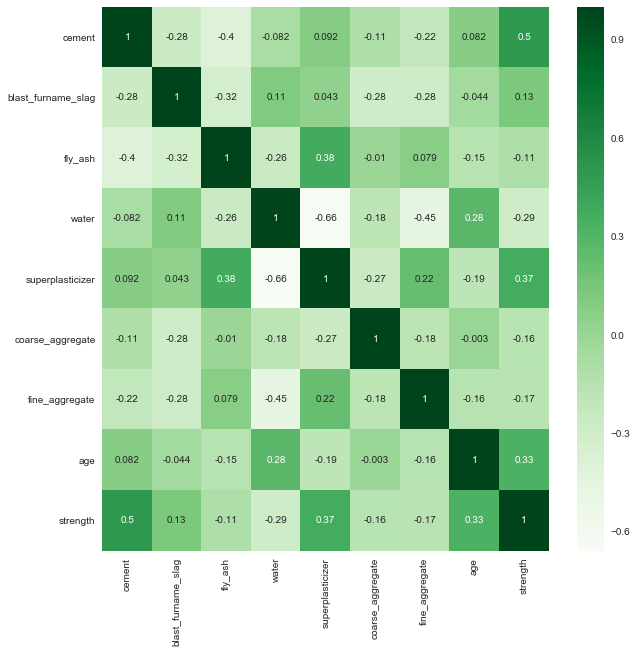

In [197]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="Greens", annot=True)

Lo que podemos notar en primera instancia es que no existen grandes ni fuerte correlaciones entre variables, por lo que no se vee necesario eliminar alguna de ellas.

### Histogramas por variable

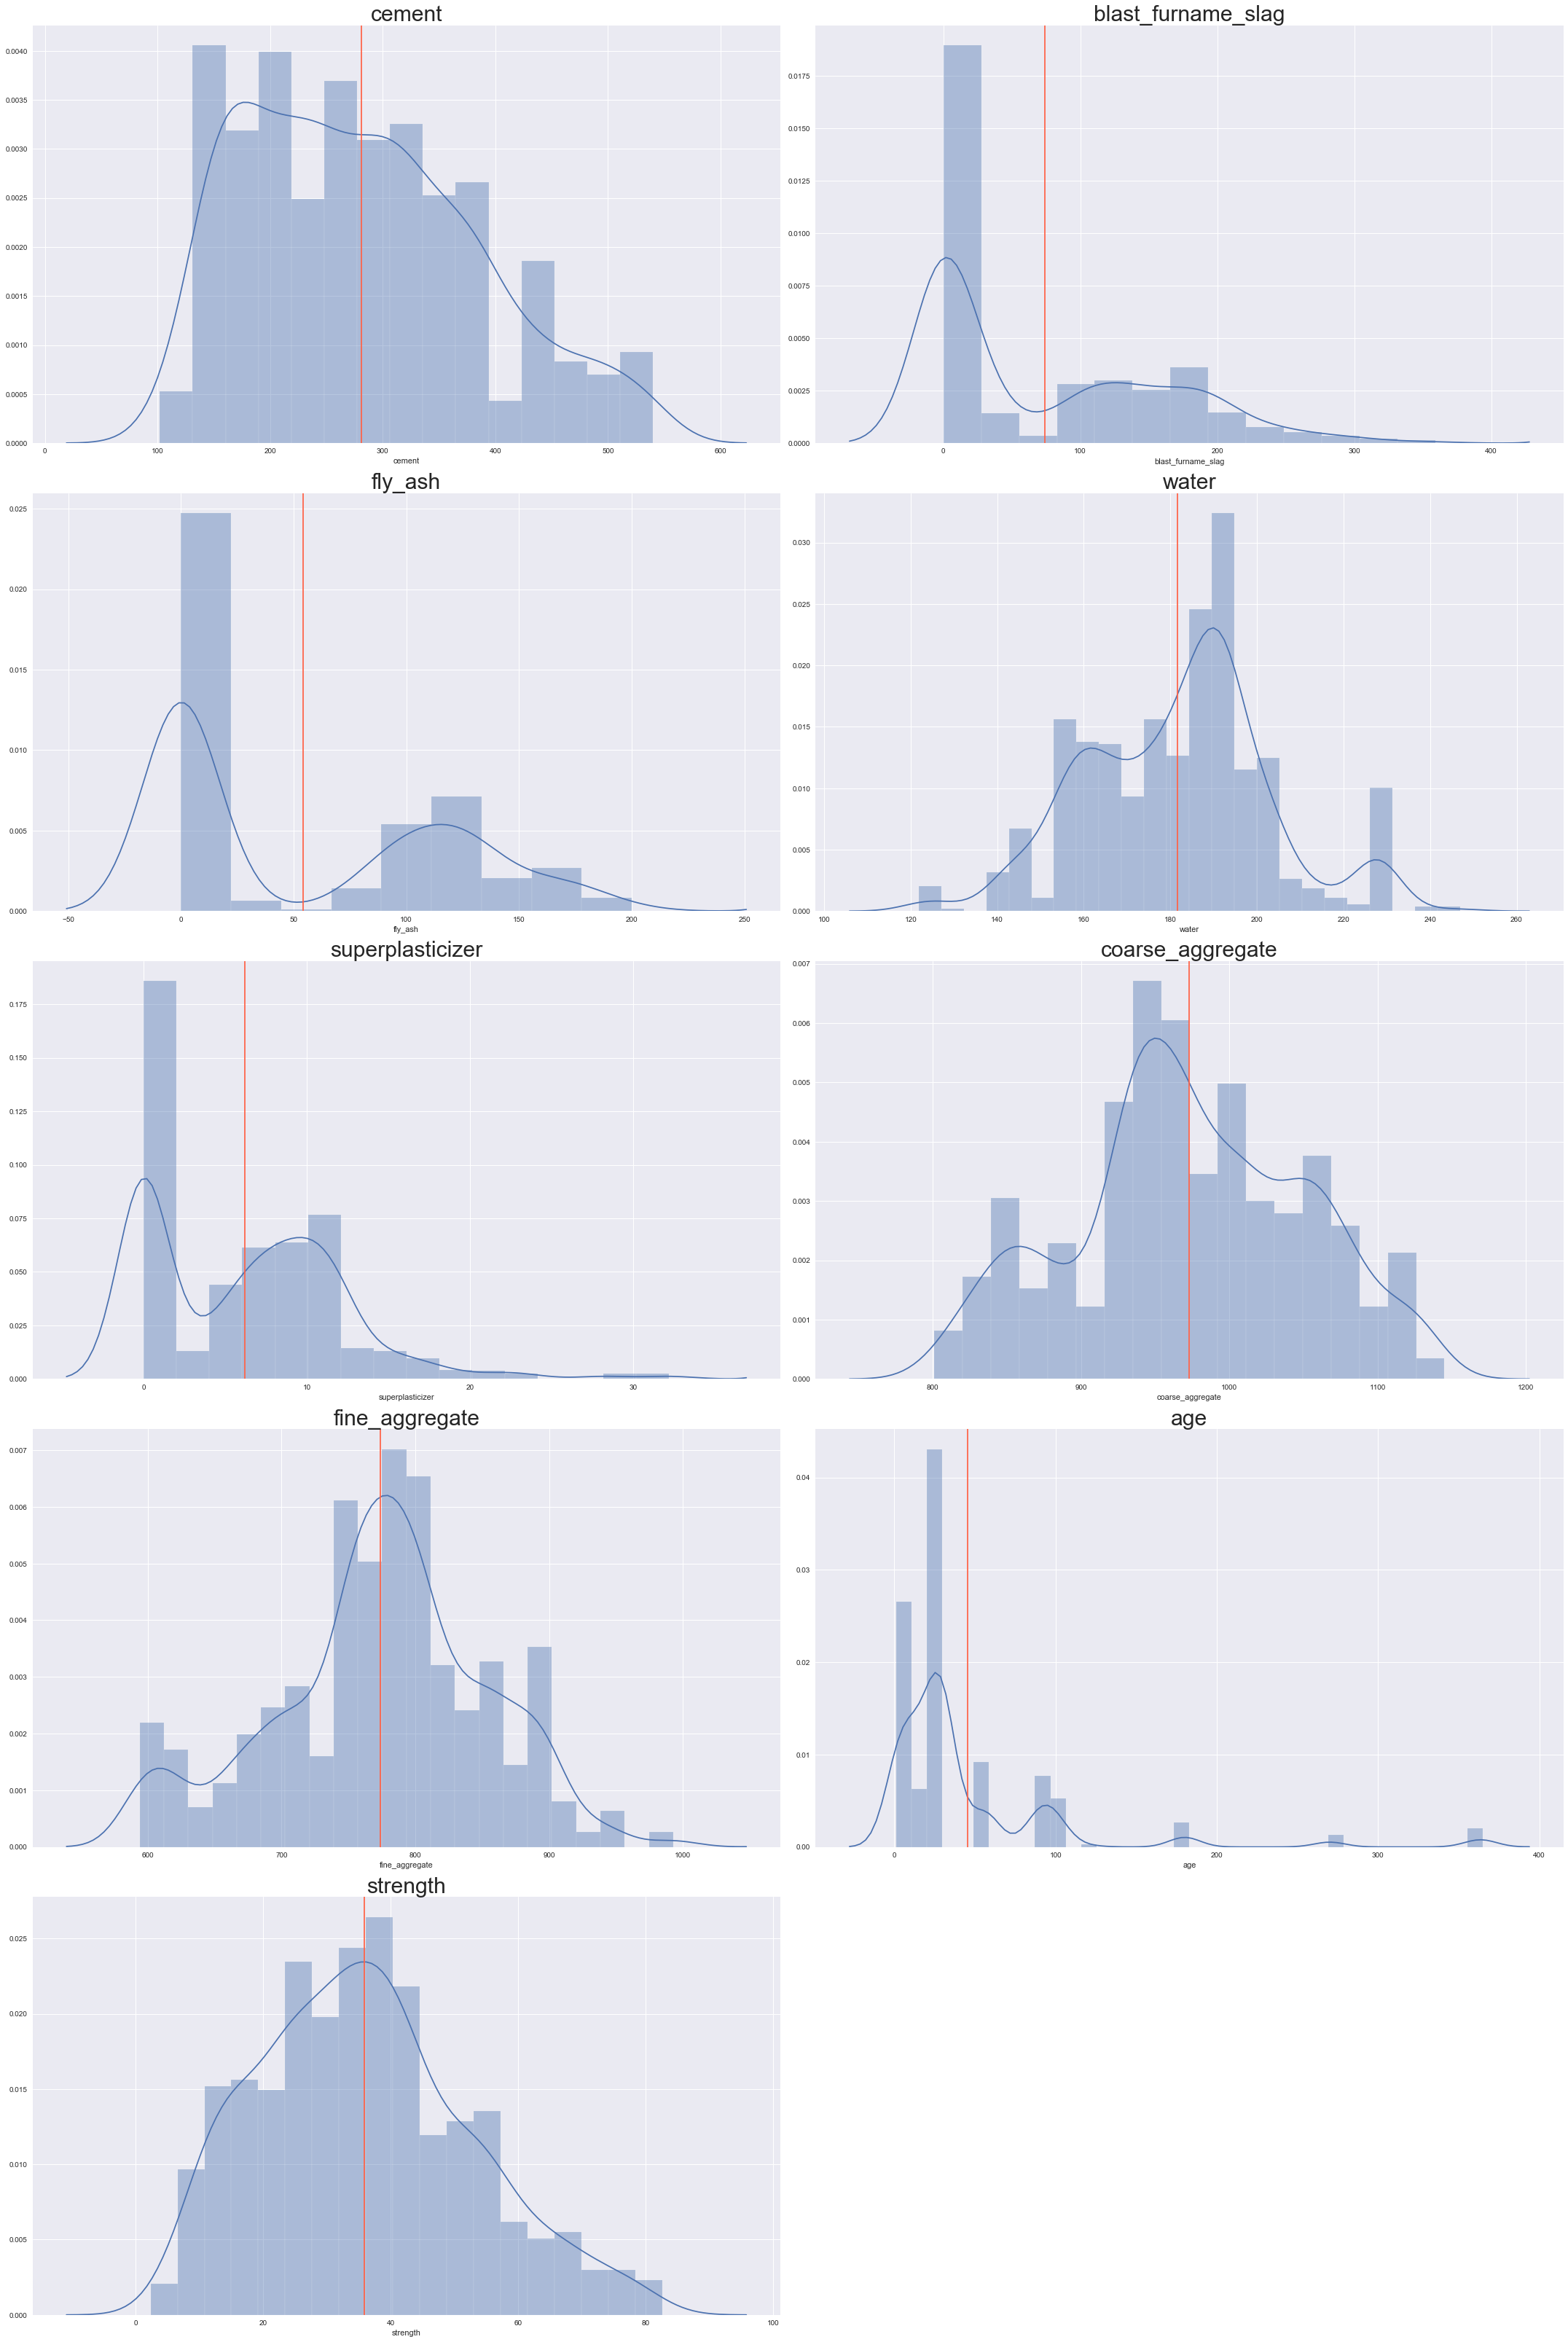

In [198]:
fig = plt.figure(figsize=(30, 80))
ubicacion_graf = 1
for i in df.columns:
    ax = fig.add_subplot(len(df.columns), 2, ubicacion_graf)
    sns.distplot(df[i])
    ax.set_title(i, size = 30)
    plt.axvline(np.mean(df[i]), color='tomato')
    plt.tight_layout()
    ubicacion_graf = ubicacion_graf + 1

* Existen diferencias gigantes en las escalas de las diferentes variables, lo que puede afectar a la creación del modelo y a posteriors regresiones, por ende si se hace necesario normalizar los datos.


# Ejercicio 3: Modelo

* En base al vector objetivo, decida el mejor modelo e importelo con pygam. Condicional a esto, importe las métricas de desempeño asociadas.
* Genere conjuntos de entrenamiento y validación
* Genere un primer modelo sin implementar la funcion gridsearch. Reporte el hiperparámetro lam así como las métricas de desempeño asociadas.
* Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiperparámetro y sus métricas de desempeño. 

In [199]:
# Normalización de los datos

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

## Modelo sin gridsearch

In [200]:
X = df_scaled.iloc[:, :8]
N = X.shape[0]
y = df_scaled['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 63)

gam_nogrid = LinearGAM().fit(X_train, y_train)

### Hiperparámetro lam

In [201]:
gam_nogrid.lam

0.6

In [202]:
gam_nogrid.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     95.3706
Link Function:                     IdentityLink Log Likelihood:                                 -2342.9406
Number of Samples:                          721 AIC:                                             4878.6224
                                                AICc:                                            4908.7161
                                                GCV:                                                0.1202
                                                Scale:                                               0.092
                                                Pseudo R-Squared:                                   0.9221
Feature Function   Data Type      Num

### Métricas del modelo

In [203]:
report_metrics(gam_nogrid, X_test, y_test)

Test R2 accuracy: 0.8934
Test MSE accuracy: 0.0965
Test MAE accuracy: 0.2162


## Modelo con gridsearch

In [204]:
search_params = {'lam': np.logspace(-3, 3, 11)}

In [205]:
gam_grid = LinearGAM().gridsearch(X_train, y_train, **search_params)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


### Hiperparámetro lam

In [206]:
gam_grid.lam

0.25118864315095796

In [207]:
gam_grid.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    107.5145
Link Function:                     IdentityLink Log Likelihood:                                 -2374.4345
Number of Samples:                          721 AIC:                                              4965.898
                                                AICc:                                             5004.767
                                                GCV:                                                0.1205
                                                Scale:                                              0.0887
                                                Pseudo R-Squared:                                   0.9264
Feature Function   Data Type      Num

### Métricas del modelo

In [208]:
report_metrics(gam_grid, X_test, y_test)

Test R2 accuracy: 0.8951
Test MSE accuracy: 0.0961
Test MAE accuracy: 0.2089


## Comparativa de métricas de modelos

In [209]:
print(report_metrics(gam_nogrid, X_test, y_test))
print("El valor de lam para el modelo sin gridsearch es: " + str(gam_nogrid.lam))

Test R2 accuracy: 0.8934
Test MSE accuracy: 0.0965
Test MAE accuracy: 0.2162
None
El valor de lam para el modelo sin gridsearch es: 0.6


In [210]:
print(report_metrics(gam_grid, X_test, y_test))
print("El valor de lam para el modelo con gridsearch es: " + str(gam_grid.lam))

Test R2 accuracy: 0.8951
Test MSE accuracy: 0.0961
Test MAE accuracy: 0.2089
None
El valor de lam para el modelo con gridsearch es: 0.25118864315095796


Las métricas tanto para Rsquared, MSE y MAE son marginalmente distintas entre los dos modelos, por ende no podemos indicar que la elección de uno u otro genere una mejora enorme en la calidad del modelo, pero como indicabamos, marginalmente el mejor modelo corresponde al que usa gridsearch. 

# Ejercicio 4: Dependencia parcial

* En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
* Para ello, genere una funcion que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.
* Reporte brevemente sobre qué atributos están asociados a mayores y menores niveles de resistencia

In [211]:
def dependencia_parcial(modelo, colnames):
    x_grid = generate_X_grid(modelo)
    rows = int(len(colnames) / 2)
    
    for i, n in enumerate(range(len(colnames))):
        plt.subplot(rows, 2, i + 1)
        partial_dep, confidence_intervals = modelo.partial_dependence(x_grid, feature=i + 1, width=.95)
        plt.plot(x_grid[:, n], partial_dep, color='tomato')
        plt.fill_between(x_grid[:, n],
                        confidence_intervals[0][:, 0],
                        confidence_intervals[0][:, 1],
                        color='tomato', alpha=.25)
        plt.title(colnames[n]) 
        plt.tight_layout

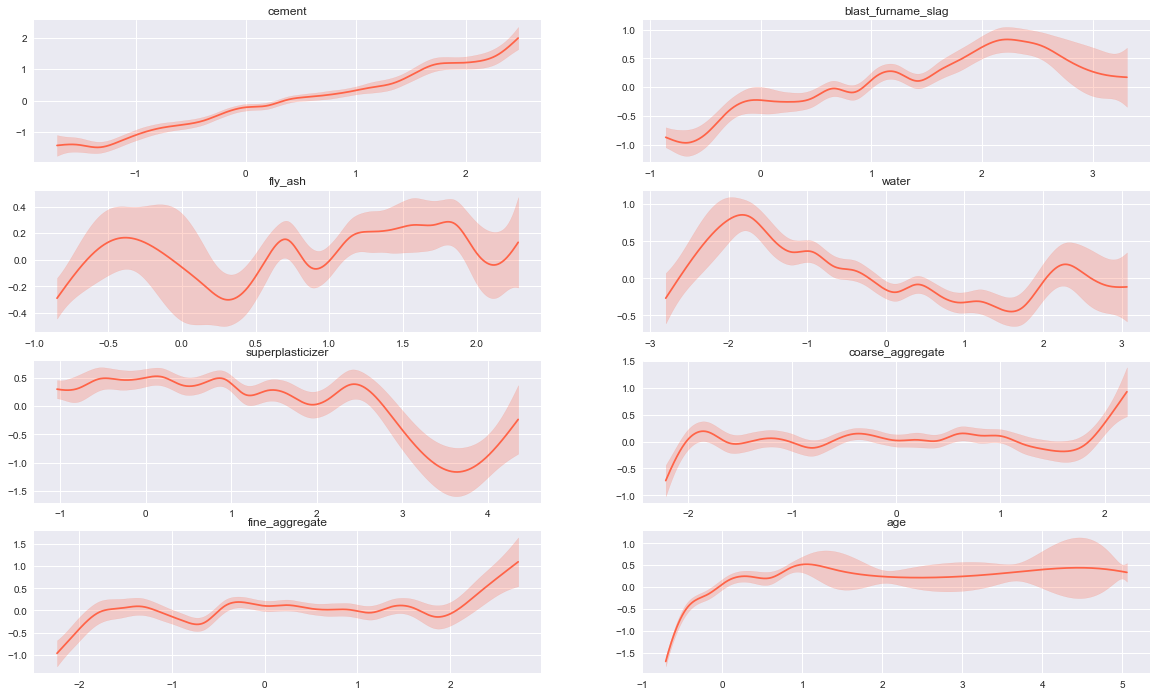

In [212]:
dependencia_parcial(gam_grid, colnames=df_scaled.columns[0:8])

* ```cement```: A mayor cantidad de cemento que se agregue, mas fuerza se obtendrá
* ```blast_furname_slag```: Esta variable hace aumentar la fuerza hasta su valor 2 pero luego de ello, hace que la fuerza disminuya
* ```water```: a medida que se va agregando agua, llega un punto en que esta comienza a disminuir la fuerza
* ```superplasticizer```: Aprox. luego de 
* ```coarse_aggregate```:  esta variable aporta en el inicio, se mantiene estable y luego aumenta aprox. en el 2
* ```fine_aggregate```: Mismo impacto que coarse aggregate
* ```age```: Aporta durante en el comienzo para después estabilizarse.
